![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/multi_lingual_text_classification/colab/Training/multi_lingual/binary_text_classification/NLU_multi_lingual_training_sentiment_classifier_demo_stock_market.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 Class Stock Market  Sentiment Classifier Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training  data  : 

<br> 

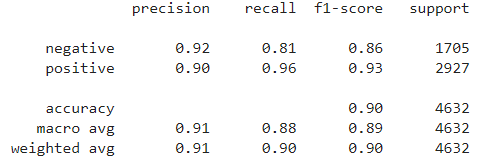


You can achieve these results or even better on this dataset with test  data  : 

<br> 

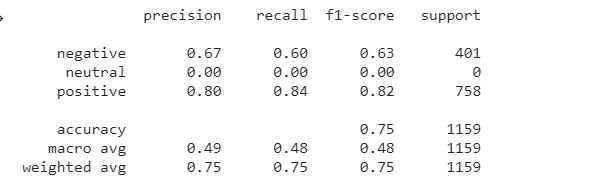


# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install  pyspark==2.4.7 
! pip install nlu > /dev/null    



import nlu

     |████████████████████████████████| 217.9MB 60kB/s 
     |████████████████████████████████| 204kB 20.5MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279465 sha256=c56d2544e96e924a9a3b4a33eadae4c854f9cb0d05b22a95a93c95196f61a481
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark


# 2. Download Stock Market  Sentiment dataset 
https://www.kaggle.com/yash612/stockmarket-sentiment-dataset
#Context

Gathered Stock news from Multiple twitter Handles regarding Economic news dividing into two parts : Negative and positive.

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/stock_data_multi_lingual.csv


--2021-02-25 14:19:27--  http://ckl-it.de/wp-content/uploads/2021/02/stock_data_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 564444 (551K) [text/csv]
Saving to: ‘stock_data_multi_lingual.csv’

stock_data_multi_li 100%[===================>] 551.21K   954KB/s    in 0.6s    

2021-02-25 14:19:27 (954 KB/s) - ‘stock_data_multi_lingual.csv’ saved [564444/564444]



In [ ]:
import pandas as pd
train_path = '/content/stock_data_multi_lingual.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
1764,"Green Weekly Triangle on CB,....Open Sell Shor...",negative
5155,Prices for debt from companies including Ford ...,positive
2042,user: EXC = undervalued here. Where is the yi...,positive
106,VNG - 12 mil shares shorts plus long buying = ...,positive
131,CEE Over 35.12,positive
...,...,...
5461,India's 2019-20 Fuel Demand Growth Worst In Ov...,negative
5727,Weak Listing For SBI Cards; Shares Fall 12% At...,negative
5508,"Sensex Opens Over 350 Points Lower, Nifty Belo...",negative
4216,EN wants higher,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(60)  
trainable_pipe['sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
              precision    recall  f1-score   support

    negative       0.92      0.81      0.86      1705
    positive       0.90      0.96      0.93      2927

    accuracy                           0.90      4632
   macro avg       0.91      0.88      0.89      4632
weighted avg       0.91      0.90      0.90      4632



,y,sentiment_confidence,sentiment,document,text,xx_embed_sentence_labse_embeddings
origin_index,,,,,,
1764,negative,0.999999,negative,"Green Weekly Triangle on CB,....Open Sell Shor...","Green Weekly Triangle on CB,....Open Sell Shor...","[-0.007076278328895569, -0.021284468472003937,..."
5155,positive,1.000000,positive,Prices for debt from companies including Ford ...,Prices for debt from companies including Ford ...,"[-0.01115849893540144, -0.009219897910952568, ..."
2042,positive,0.997436,positive,user: EXC = undervalued here. Where is the yie...,user: EXC = undervalued here. Where is the yi...,"[-0.036913227289915085, -0.06303010880947113, ..."
106,positive,0.999727,positive,VNG - 12 mil shares shorts plus long buying = ...,VNG - 12 mil shares shorts plus long buying = ...,"[-0.06516604125499725, 0.03032655082643032, 0...."
131,positive,1.000000,positive,CEE Over 35.12,CEE Over 35.12,"[-0.03404775634407997, -0.014357814565300941, ..."
...,...,...,...,...,...,...
5461,negative,0.999992,negative,India's 2019-20 Fuel Demand Growth Worst In Ov...,India's 2019-20 Fuel Demand Growth Worst In Ov...,"[0.03744948282837868, -0.040541376918554306, -..."
5727,negative,1.000000,negative,Weak Listing For SBI Cards; Shares Fall 12% At...,Weak Listing For SBI Cards; Shares Fall 12% At...,"[-0.0797317773103714, 0.0019395140698179603, 0..."
5508,negative,1.000000,negative,"Sensex Opens Over 350 Points Lower, Nifty Belo...","Sensex Opens Over 350 Points Lower, Nifty Belo...","[-0.07855619490146637, -0.012150928378105164, ..."


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.67      0.60      0.63       401
     neutral       0.00      0.00      0.00         0
    positive       0.80      0.84      0.82       758

    accuracy                           0.75      1159
   macro avg       0.49      0.48      0.48      1159
weighted avg       0.75      0.75      0.75      1159



# 4. Test Model  on 20 languages!

In [ ]:
train_df = pd.read_csv("/content/stock_data_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.56      0.77      0.65        13
     neutral       0.00      0.00      0.00         0
    positive       0.96      0.90      0.93        87

    accuracy                           0.88       100
   macro avg       0.51      0.56      0.52       100
weighted avg       0.91      0.88      0.89       100



,y,sentiment_confidence,sentiment,document,text,xx_embed_sentence_labse_embeddings
origin_index,,,,,,
0,positive,1.000000,positive,İzləmə siyahımdakı Kickers XIDE TIT SOQ PNK CP...,İzləmə siyahımdakı Kickers XIDE TIT SOQ PNK CP...,"[-0.0005844637053087354, 0.012249339371919632,..."
1,positive,1.000000,positive,उपयोगकर्ता: AAP MOVIE। वर्ष के लिए FEA / GEED ...,उपयोगकर्ता: AAP MOVIE। वर्ष के लिए FEA / GEED ...,"[-0.02774488739669323, -0.03464013338088989, -..."
2,positive,0.839511,negative,משתמש אני מפחד לקצר את AMZN - הם נראים כמו מונ...,משתמש אני מפחד לקצר את AMZN - הם נראים כמו מונ...,"[-0.029554717242717743, -0.002601801883429289,..."
3,positive,1.000000,positive,12.00 से अधिक MNTA,12.00 से अधिक MNTA,"[-0.03708070144057274, 0.05491333454847336, 0...."
4,positive,1.000000,positive,OI 21.37ден жогору,OI 21.37ден жогору,"[-0.043793778866529465, 0.031909242272377014, ..."
...,...,...,...,...,...,...
95,positive,0.768944,positive,NG nhod - kyk na die weeklikse - teiken vorige...,NG nhod - kyk na die weeklikse - teiken vorige...,"[-0.03982162848114967, -0.07269032299518585, -..."
96,positive,1.000000,positive,NG nhod - ¿qué ves? consulte el semanario - ob...,NG nhod - ¿qué ves? consulte el semanario - ob...,"[-0.04516296088695526, -0.04459896311163902, 0..."
97,negative,0.999901,negative,এআইজি আমেরিকান ইন্টারন্যাশনাল গ্রুপ অপশন ট্রেড...,এআইজি আমেরিকান ইন্টারন্যাশনাল গ্রুপ অপশন ট্রেড...,"[-0.07162036746740341, -0.009962097741663456, ..."


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("Bitcoin dropped by 50 percent !!!")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999990,negative,Bitcoin dropped by 50 percent !!!,"[-0.05163612216711044, -0.029772669076919556, ..."


In [ ]:
fitted_pipe.predict("Bitcoin went up  by 50 percent !!!")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999999,positive,Bitcoin went up by 50 percent !!!,"[-0.028688771650195122, -0.026630524545907974,..."


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for:'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Bitcoin stieg um 50 Prozent auf !!! ")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999999,positive,Bitcoin stieg um 50 Prozent auf !!!,"[-0.03815653175115585, -0.0247296504676342, -0..."


In [ ]:
# German for: 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("Bitcoin fiel um 50 Prozent !!! ")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999986,negative,Bitcoin fiel um 50 Prozent !!!,"[-0.05688923969864845, -0.02544567361474037, -..."


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: "Bitcoin dropped by 50 percent !!!"
fitted_pipe.predict("比特币下跌了50％!!!")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999996,negative,比特币下跌了50％!!!,"[-0.07537585496902466, -0.027679990977048874, ..."


In [ ]:
# Chinese for : "Bitcoin went up by 50 percent !!!"
fitted_pipe.predict("比特币上涨了50％！")


,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,1.000000,positive,比特币上涨了50％！,"[-0.041133344173431396, -0.009412097744643688,..."


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
# Afrikaans for 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Bitcoin het met 50 persent toegeneem !!!")


,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999865,positive,Bitcoin het met 50 persent toegeneem !!!,"[-0.03586146980524063, -0.03901936113834381, -..."


In [ ]:
# Afrikaans for :'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoin het met 50 persent gedaal !!! |')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999794,negative,Bitcoin het met 50 persent gedaal !!! |,"[-0.05142545327544212, -0.03921075537800789, -..."


# The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:
# Vietnamese for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('Bitcoin đã tăng 50% !!! ')


,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999934,positive,Bitcoin đã tăng 50% !!!,"[-0.03511587902903557, -0.053469520062208176, ..."


In [ ]:
# Vietnamese for : 'Bitcoin droppedy by 50 percent !!!'
fitted_pipe.predict('Bitcoin giảm 50% !!! ')


,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999608,negative,Bitcoin giảm 50% !!!,"[-0.013879713602364063, -0.0543162003159523, -..."


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:

# Japanese for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('ビットコインは50％上昇しました!!! ')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,1.000000,positive,ビットコインは50％上昇しました!!!,"[-0.044070836156606674, -0.013696333393454552,..."


In [ ]:

# Japanese for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoinは50％減少しました!')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999990,negative,Bitcoinは50％減少しました!,"[-0.056898221373558044, -0.04127807542681694, ..."


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Zulu for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('I-Bitcoin inyuke ngamaphesenti ama-50 !!!')


,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.998867,positive,I-Bitcoin inyuke ngamaphesenti ama-50 !!!,"[-0.042268361896276474, -0.029177553951740265,..."


In [ ]:
# Zulu for : 'The whole crypto system crashed!!! '
fitted_pipe.predict('Lonke uhlelo lwe-crypto luphahlazeka !!!')


,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999740,negative,Lonke uhlelo lwe-crypto luphahlazeka !!!,"[0.014095775783061981, -0.06292989104986191, -..."


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
# Turkish for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoin yüzde 50 düştü !!! ')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999880,negative,Bitcoin yüzde 50 düştü !!!,"[-0.02441185712814331, -0.041124653071165085, ..."


In [ ]:
# Turkish for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('Bitcoin yüzde 50 arttı !!!')



,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999990,positive,Bitcoin yüzde 50 arttı !!!,"[-0.02950633130967617, -0.02281446009874344, -..."


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoin ירד ב -50% !!! ')



,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999989,negative,Bitcoin ירד ב -50% !!!,"[-0.058318842202425, -0.04578538239002228, -0...."


In [ ]:
# Hebrew for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('Bitcoin עלה ב -50% !!! ')


,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999998,positive,Bitcoin עלה ב -50% !!!,"[-0.038753289729356766, -0.04096424579620361, ..."


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('బిట్\u200cకాయిన్ 50 శాతం పెరిగింది !!!' )

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,1.000000,positive,బిట్‌కాయిన్ 50 శాతం పెరిగింది !!!,"[-0.046535082161426544, 0.020184200257062912, ..."


In [ ]:
# Telgu for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('బిట్\u200cకాయిన్ 50 శాతం పడిపోయింది !!! ')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999992,negative,బిట్‌కాయిన్ 50 శాతం పడిపోయింది !!!,"[-0.07144765555858612, 0.004319730680435896, -..."


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
# Russian for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Биткойн упал на 50 процентов !!! ')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999980,negative,Биткойн упал на 50 процентов !!!,"[-0.05514690652489662, -0.025273717939853668, ..."


In [ ]:
# Russian for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('Биткойн поднялся на 50 процентов !!!')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,1.000000,positive,Биткойн поднялся на 50 процентов !!!,"[-0.0347013995051384, -0.016639329493045807, -..."


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
# Urdu for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoin 50 فیصد کی طرف سے گرا دیا !!!')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999964,negative,Bitcoin 50 فیصد کی طرف سے گرا دیا !!!,"[-0.04297984763979912, -0.042187489569187164, ..."


In [ ]:
# Urdu for : 'TDollar rates skyrocketed!!'
fitted_pipe.predict('ڈالر کے نرخ آسمان چھائے ہوئے ہیں !!!')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999181,positive,ڈالر کے نرخ آسمان چھائے ہوئے ہیں !!!,"[-0.0676291286945343, -0.02299042046070099, -0..."


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Hindi for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('बिटकॉइन 50 प्रतिशत चढ़ गया !!! ')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999517,positive,बिटकॉइन 50 प्रतिशत चढ़ गया !!!,"[-0.03370288014411926, -0.027637386694550514, ..."


In [ ]:
# Hindi for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('बिटकॉइन में 50 प्रतिशत की गिरावट !!!')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999991,negative,बिटकॉइन में 50 प्रतिशत की गिरावट !!!,"[-0.05678804963827133, -0.04536443203687668, -..."


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoin 50 процентка төште !!!')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999964,negative,Bitcoin 50 процентка төште !!!,"[-0.04669538140296936, -0.04520617797970772, -..."


In [ ]:
# Tartar for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('Биткойн 50 процентка артты !!!')

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999982,positive,Биткойн 50 процентка артты !!!,"[-0.015944577753543854, -0.024691367521882057,..."


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("Bitcoin a chuté de 50% !!! ")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999962,negative,Bitcoin a chuté de 50% !!!,"[-0.05751338228583336, -0.05539099499583244, -..."


In [ ]:
# French for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Le Bitcoin a augmenté de 50% !!! ")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,1.000000,positive,Le Bitcoin a augmenté de 50% !!!,"[-0.036177001893520355, -0.03910716623067856, ..."


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
# Thai for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Bitcoin เพิ่มขึ้น 50 เปอร์เซ็นต์ !!!")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,1.000000,positive,Bitcoin เพิ่มขึ้น 50 เปอร์เซ็นต์ !!!,"[-0.03620089590549469, -0.027675965800881386, ..."


In [ ]:
# Thai  for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("Bitcoin ลดลง 50 เปอร์เซ็นต์ !!!")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999993,negative,Bitcoin ลดลง 50 เปอร์เซ็นต์ !!!,"[-0.05988080054521561, -0.04294700548052788, -..."


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer   for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("Bitcoin បានធ្លាក់ចុះ 50 ភាគរយ !!!")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999993,negative,Bitcoin បានធ្លាក់ចុះ 50 ភាគរយ !!!,"[-0.05702926591038704, -0.04252532869577408, -..."


In [ ]:
# Khmer for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Bitcoin បានកើនឡើង 50 ភាគរយ !!! ")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,1.000000,positive,Bitcoin បានកើនឡើង 50 ភាគរយ !!!,"[-0.0398690328001976, -0.03344429284334183, -0..."


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
# Yiddish for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("ביטקאָין דראַפּט דורך 50 פּראָצענט !!!")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999909,negative,ביטקאָין דראַפּט דורך 50 פּראָצענט !!!,"[-0.05685276538133621, -0.04757661744952202, -..."


In [ ]:
# Yiddish for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("ביטקאָין איז אַרויף מיט 50 פּראָצענט !!!")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,1.000000,positive,ביטקאָין איז אַרויף מיט 50 פּראָצענט !!!,"[-0.049434419721364975, -0.051430195569992065,..."


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
# Kygrgyz for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("Bitcoin 50 пайызга төмөндөдү !!! ")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999997,negative,Bitcoin 50 пайызга төмөндөдү !!!,"[-0.0606391541659832, -0.02077414281666279, -0..."


In [ ]:
# Kygrgyz for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Bitcoin 50 пайызга көтөрүлдү !!!")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.982491,positive,Bitcoin 50 пайызга көтөрүлдү !!!,"[-0.03188328444957733, -0.00919796247035265, -..."


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("பிட்காயின் 50 சதவீதம் குறைந்தது !!!  ")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,0.999998,negative,பிட்காயின் 50 சதவீதம் குறைந்தது !!!,"[-0.06173098459839821, -0.03497230261564255, -..."


In [ ]:
# Tamil for : 'Dollar rates skyrocketed!!'
fitted_pipe.predict("ڈالر کے نرخ آسمان چھائے ہوئے ہیں !!")

,sentiment_confidence,sentiment,document,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,1.000000,positive,ڈالر کے نرخ آسمان چھائے ہوئے ہیں !!,"[-0.06327780336141586, -0.029234571382403374, ..."


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained' 

hdd_pipe = nlu.load(path="./models/classifier_dl_trained")

preds = hdd_pipe.predict('Bitcoin dropped by 50 percent!!')
preds

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.04765033349394798, -0.03717166185379028, -...",0.999998,negative,Bitcoin dropped by 50 percent!!


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')        | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['regex_tokenizer'] has settable params:
pipe['regex_tokenizer'].setCaseSensitiveExceptions(True)   | Info: Whether to care for case sensitiveness in exceptions | Currently set to : True
pipe['regex_tokenizer'].setTargetPattern('\S+')            | Info: pattern to grab from text as token candidates. Defaults \S+ | Currently set to : \S+
pipe['regex_tokenizer'].setMaxLength(99999)                | Info: Set the maximum allowed length for each token | Currently set to : 99999
pipe['regex_tokenizer'].setMinLength(0)                    | Info: Set the minimum allowed length for each token | Currently set to : 0
>>> pipe['sentence_detector'] 